<a href="https://colab.research.google.com/github/jrdom/Predict-Time-Series-Test/blob/main/Tarefa_1_%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tarefa 1: Árvores de Decisão**

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
pip install ucimlrepo

In [ ]:
# Vamos carregar o conjuto de dados e definir as variaveis
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
# Definir a variável alvo
y = wine.data.targets

# Definir a proporção de dados para treinamento e teste
train_size = 0.8
test_size = 0.2

# Stratificar a divisão dos dados para garantir a presença de todas as classes no conjunto de teste
stratify = y

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=stratify, test_size=test_size, random_state=42)

In [ ]:
# Vamos treinar o modelo de árvore de decisão
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

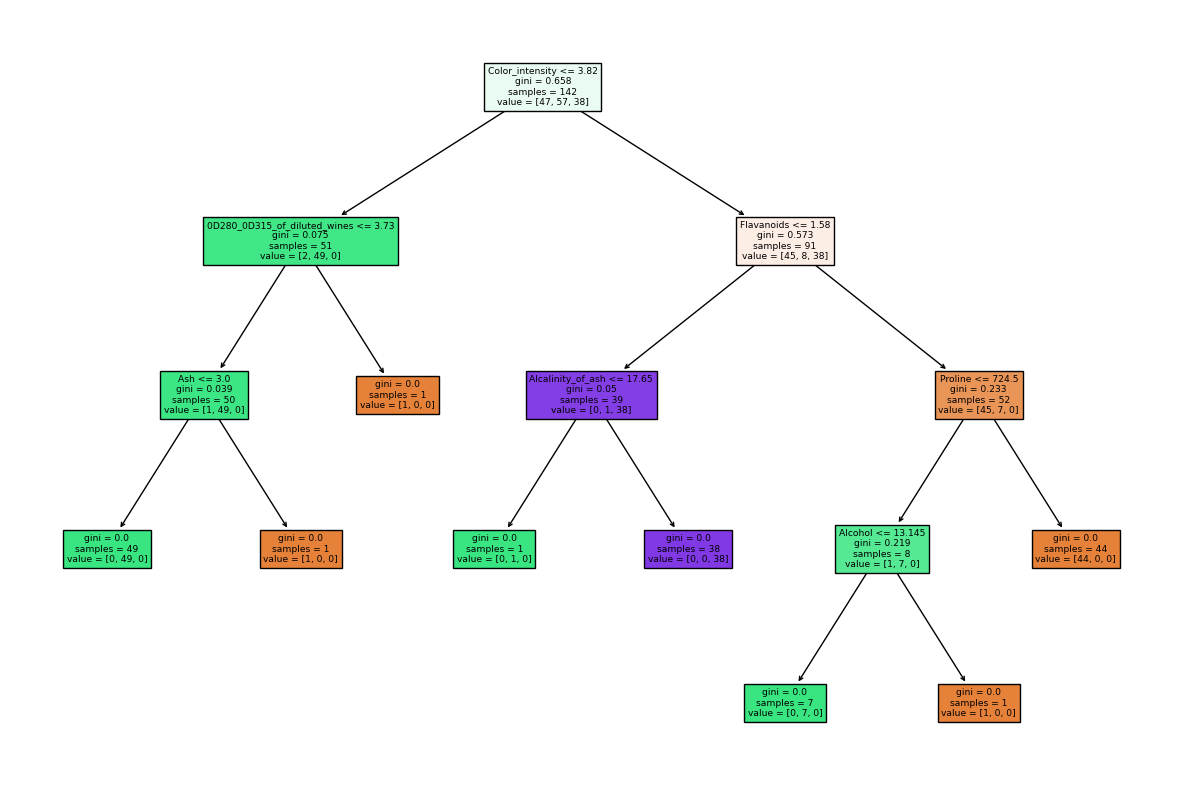

In [ ]:
# Vamos visualizar a árvore de decisão

import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
# Vamos avaliar o modelo

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Gerar o relatório de classificação
print(classification_report(y_test, y_pred))

# Calcular a acurácia
accuracy = clf.score(X_test, y_test)
print("Acurácia:", accuracy)


              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93        14
           3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Acurácia: 0.9444444444444444


In [ ]:
# Vamos obter a classificação dos erros através de matriz de confusão

from sklearn.metrics import confusion_matrix

# Criar a matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
print(confusion_matrix)


[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]
